In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train_df.shape,test_df.shape

((1460, 81), (1459, 80))

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_df.isna().sum()[train_df.isna().sum()>=1]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
test_df.isna().sum()[train_df.isna().sum()>=1]

LotFrontage      227
Alley           1352
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
Electrical         0
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
dtype: int64

In [9]:
x = train_df.loc[:,train_df.columns!= "SalePrice"].copy()
y = train_df[ "SalePrice"].copy()

In [10]:
df = pd.concat((x, test_df))
df.shape

(2919, 80)

<AxesSubplot:>

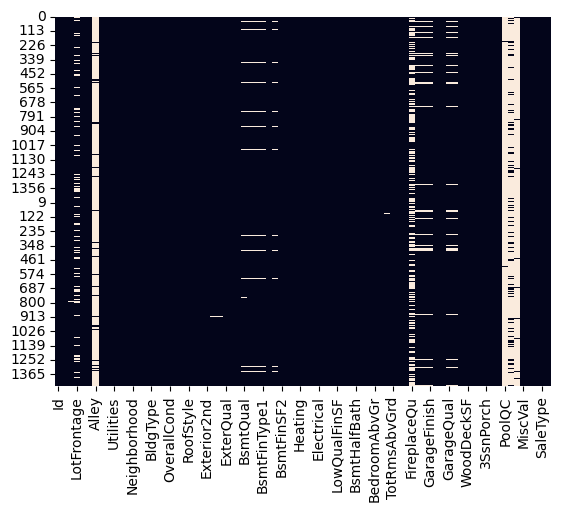

In [11]:
import seaborn as sn
sns.heatmap(df.isna(), cbar =False)

In [12]:
# we delete the columns that have 50% nan value
lignes = df.shape[0]
colones = df.columns
cols = [col for col in colones if df[col].isna().sum()>lignes/2]
cols

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [13]:
df = df.drop(columns = cols)

In [14]:
df.shape

(2919, 76)

<AxesSubplot:>

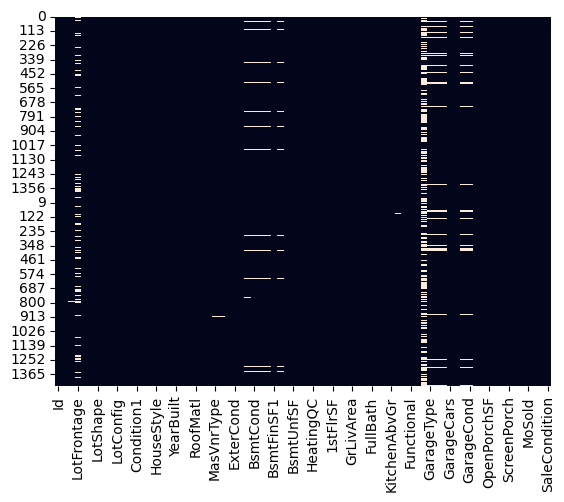

In [15]:
sns.heatmap(df.isna(), cbar =False)

In [16]:
Numarical_columns = df.select_dtypes(np.number).columns.to_list()
Categorial_columns = df.select_dtypes(object).columns.to_list()

In [17]:
df[Categorial_columns].mode()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal


<AxesSubplot:>

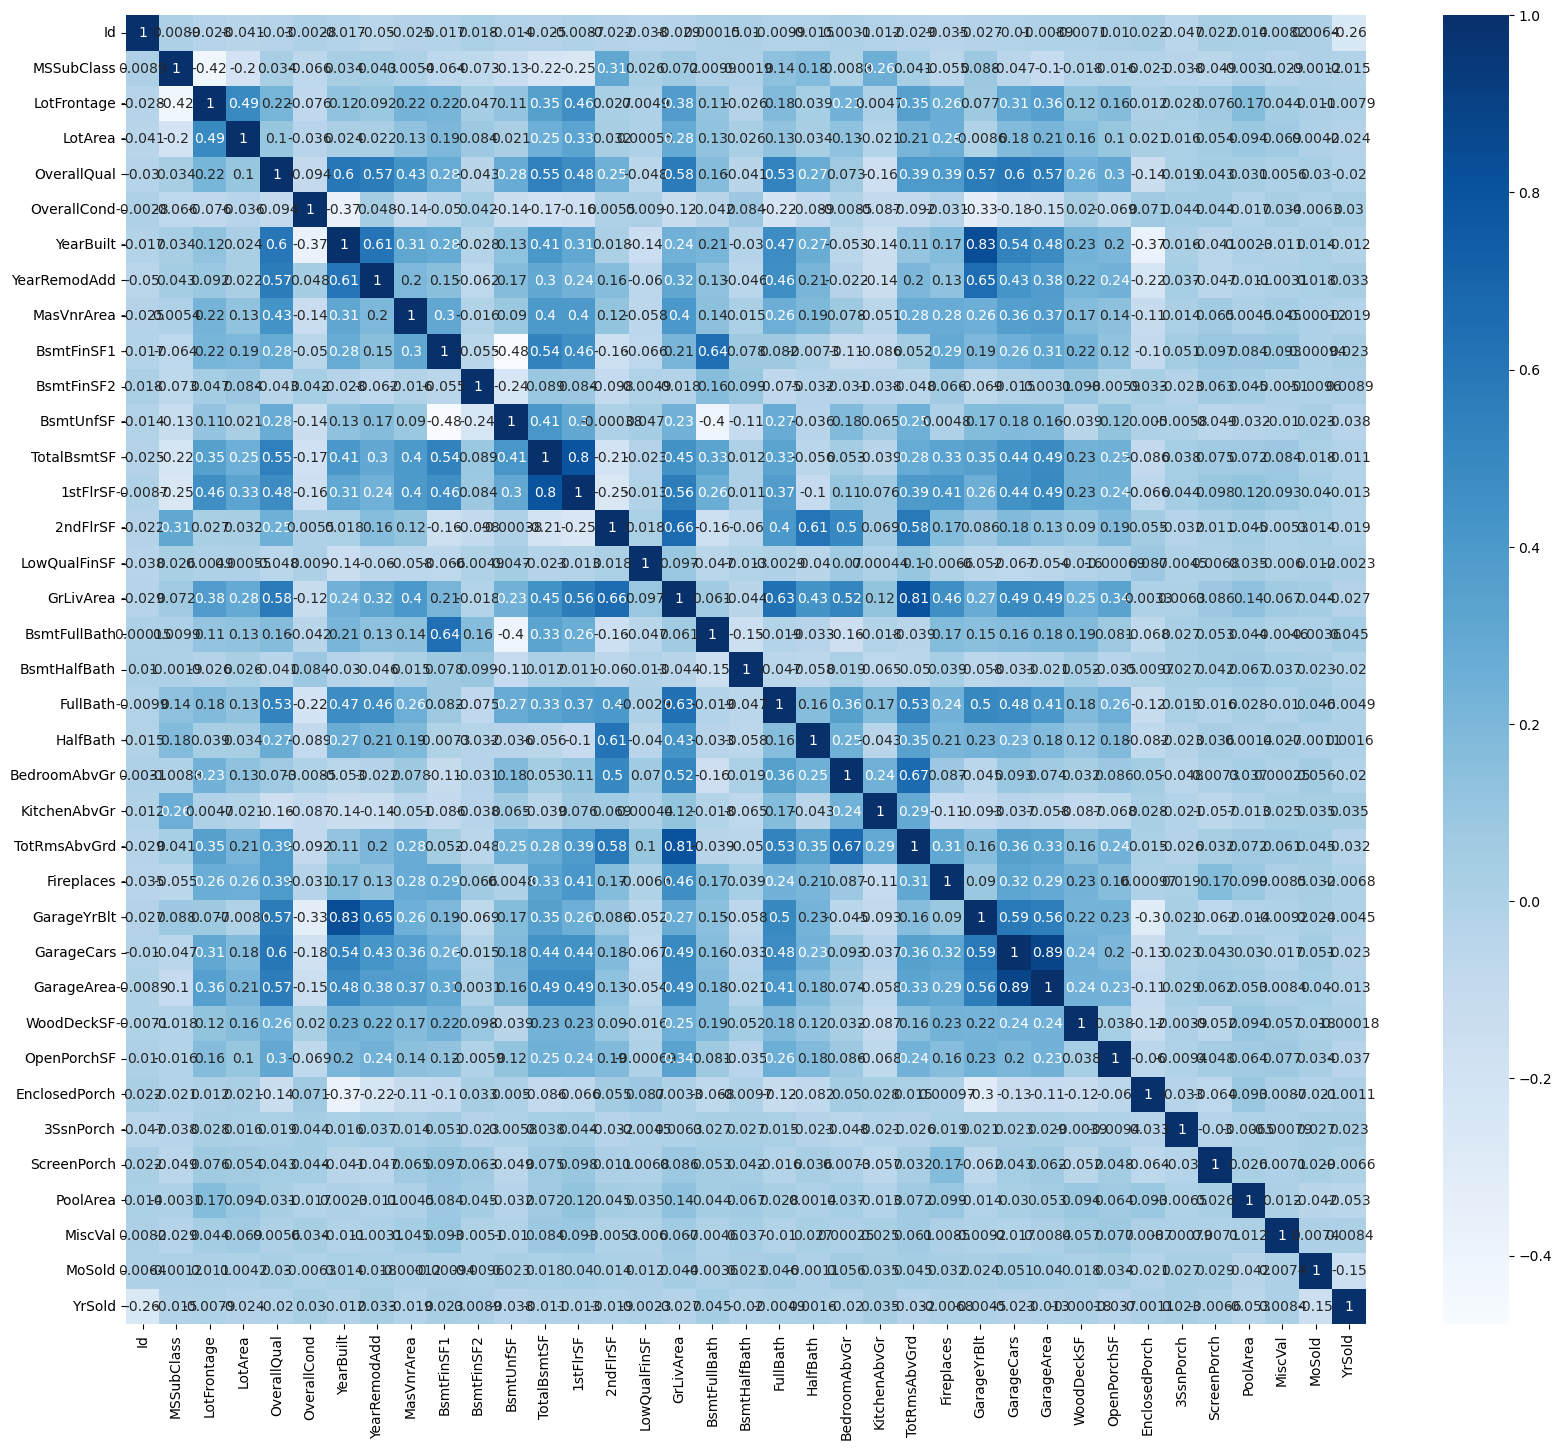

In [18]:
plt.figure(figsize = (20, 17))
sns.heatmap(df[Numarical_columns].corr(), cmap = 'Blues', annot = True)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


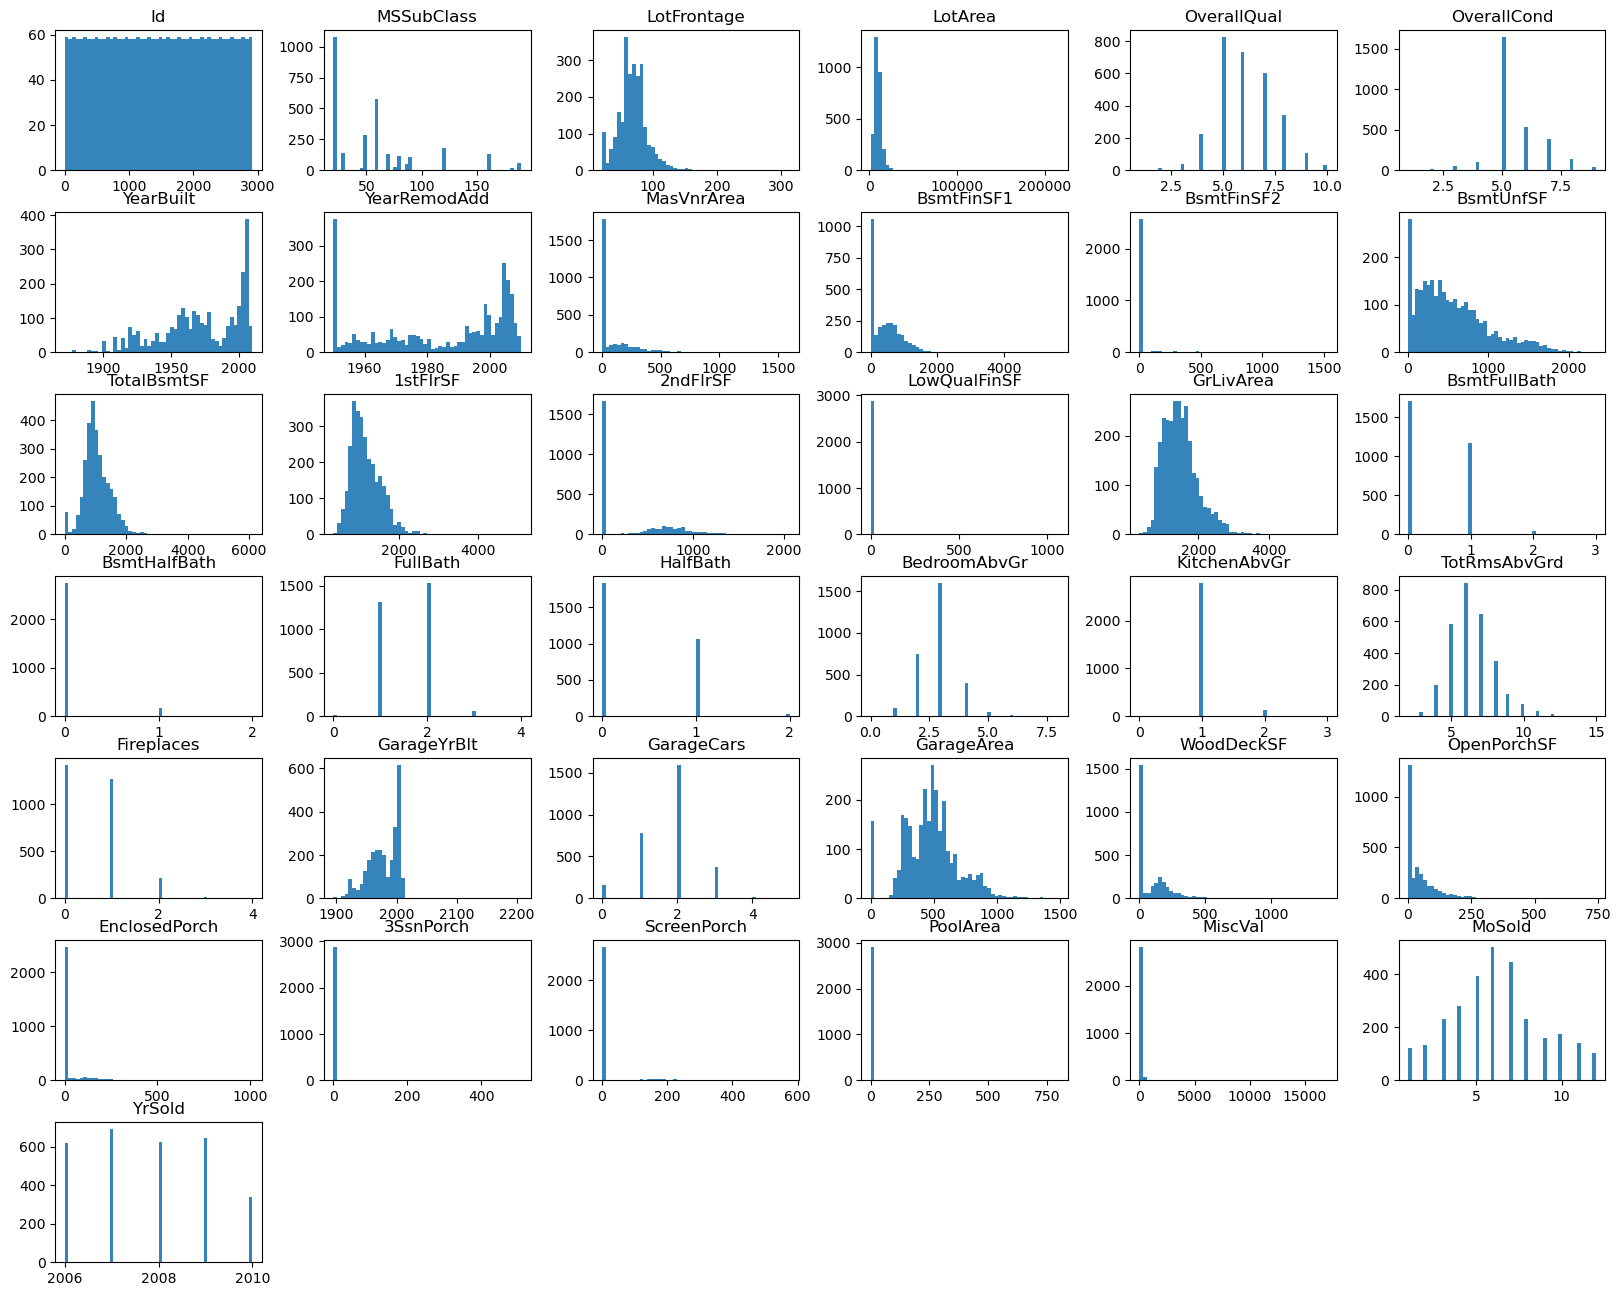

In [20]:
# distribution of numerical columns
import matplotlib.pyplot as plt 
df[Numarical_columns].hist( bins = 50, figsize=(20,16), grid=False,alpha=0.9)
plt.show()

In [21]:
columns_to_replace_nan_value = [col for col in Numarical_columns if (df[col].isnull().sum()>=1)]
columns_to_replace_nan_value

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

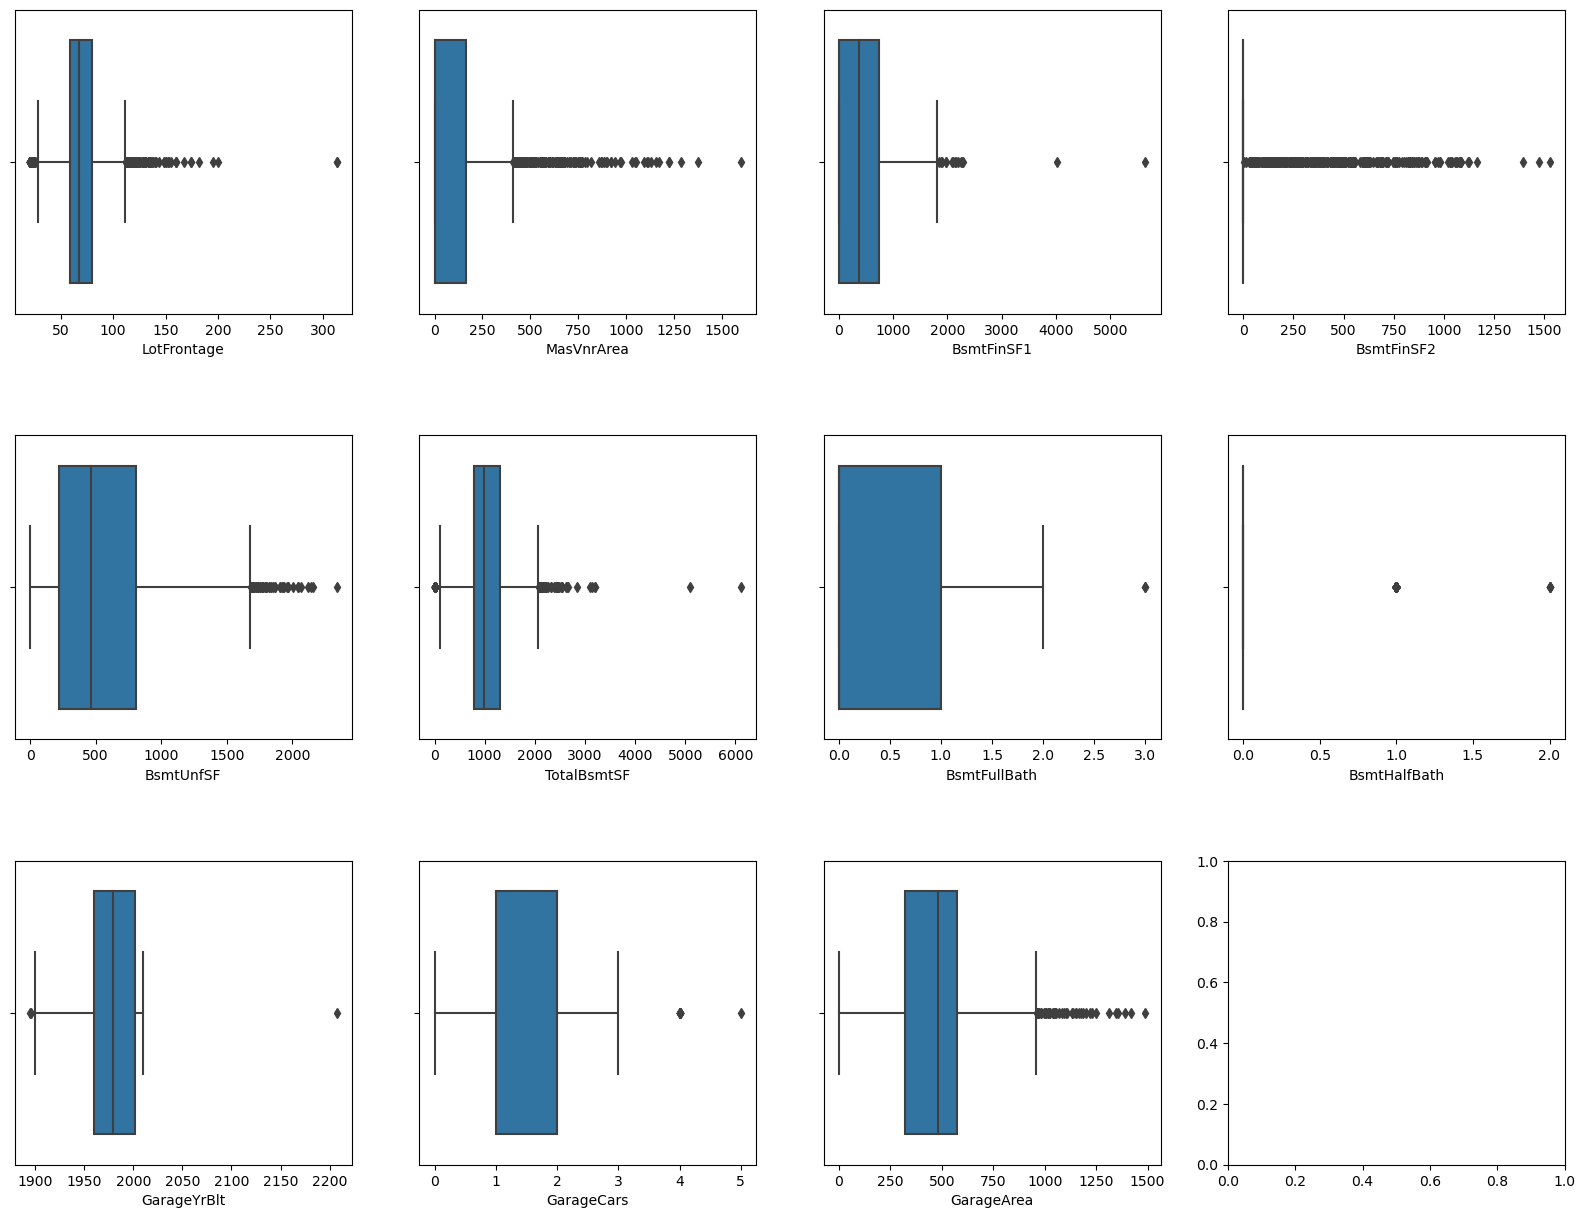

In [22]:
# plotting box plot of numerical columns to know the density of outliers 

figures, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (20,15), alpha = 0.4)
plt.subplots_adjust(hspace=0.4)
for colum, axe in zip(columns_to_replace_nan_value, axes.ravel()):
    sns.boxplot(data = df, x = colum, ax = axe)

we notice that some numerical column has lot of outliers, now we know how to replace the missing values for each column

In [23]:
columns_to_replace_nan_value

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [24]:
columns_to_replace_median = ['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF','GarageArea']

columns_to_replace_mean = [col for col in columns_to_replace_nan_value if col not in columns_to_replace_median]
columns_to_replace_mean

['BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars']

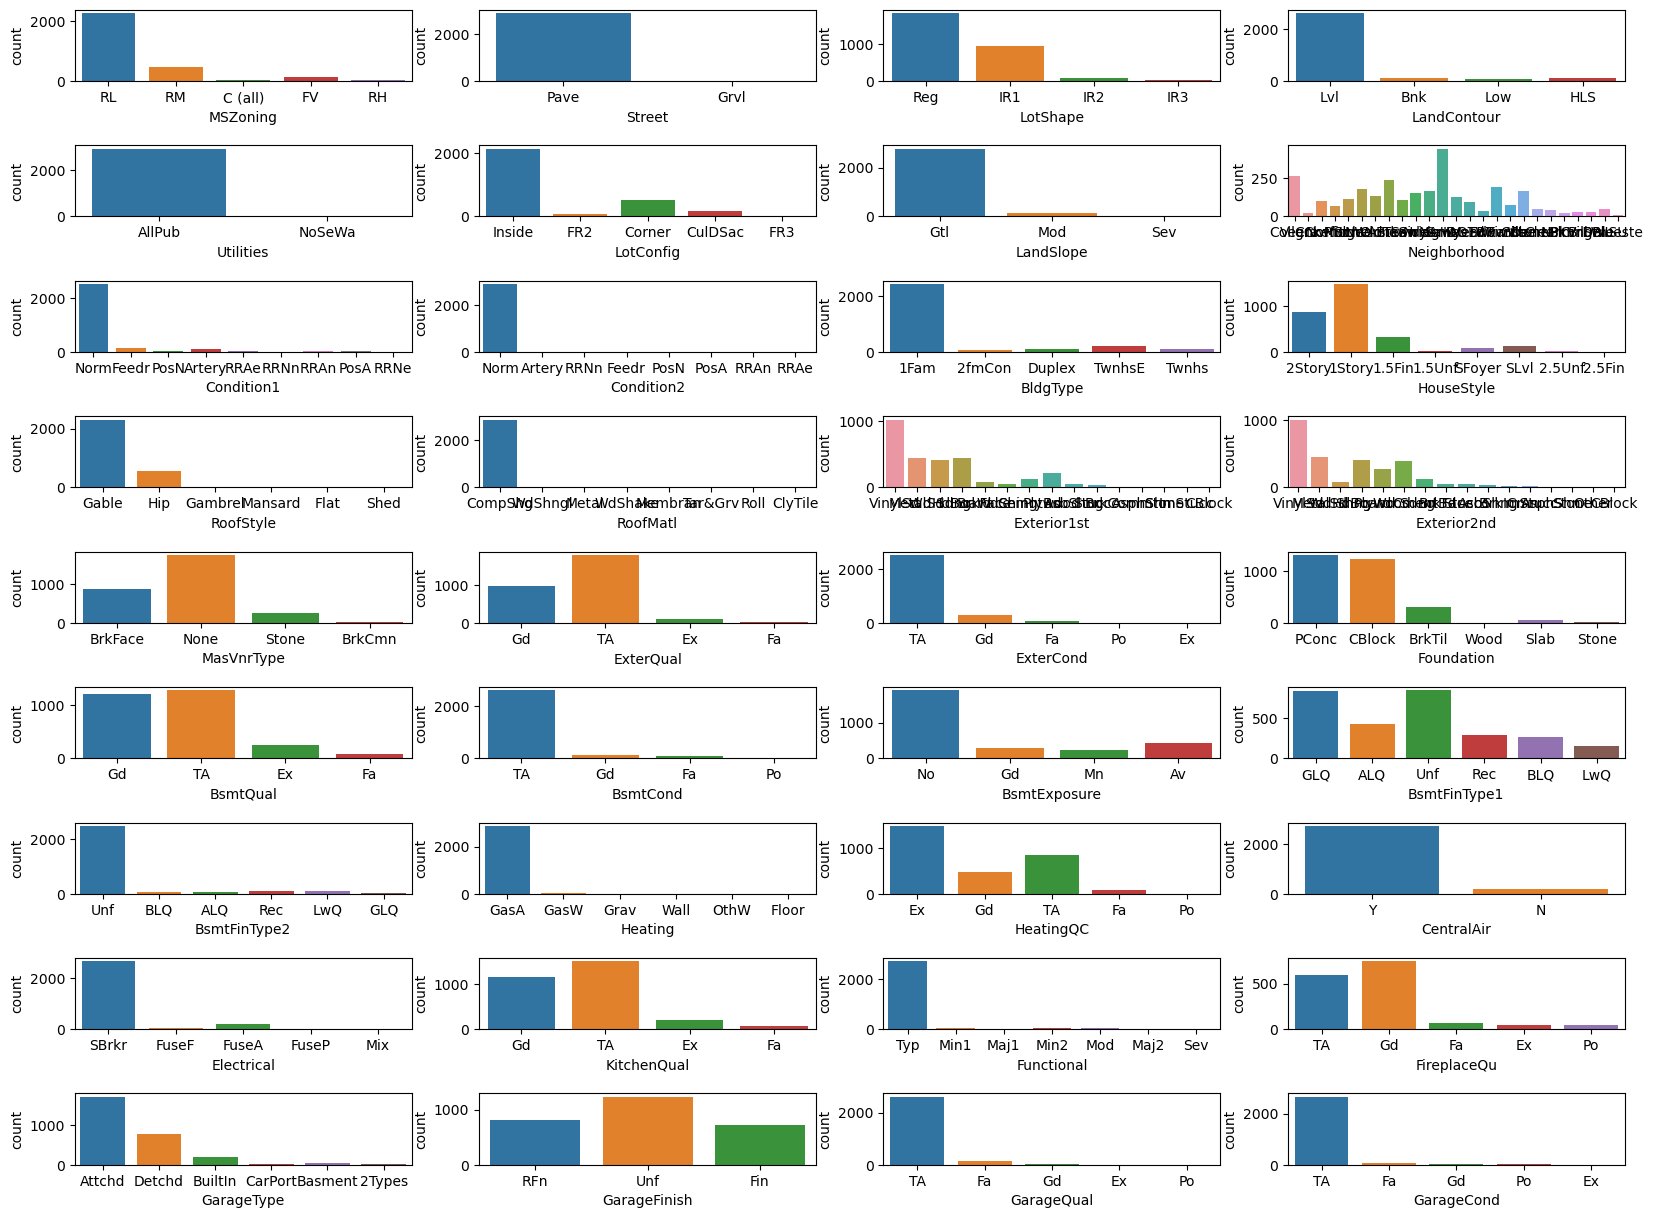

In [25]:
# distribution of categorial columns
import seaborn as sns 
figures, axes = plt.subplots(nrows = 9, ncols = 4, figsize = (20,15), alpha = 0.9)
plt.subplots_adjust(hspace=0.9)
for colum, axe in zip(Categorial_columns, axes.ravel()):
    sns.countplot(data = df, x = colum, ax = axe)

In [26]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


## DATA CLEANING

In [27]:
# replace nan values for numerical values
for column in columns_to_replace_median:
    df[column].fillna(df[column].median(), inplace = True) 
for column in columns_to_replace_mean:
    df[column].fillna(df[column].mean(), inplace = True) 

df[Numarical_columns].isnull().sum()[df[Numarical_columns].isnull().sum()>0]

Series([], dtype: int64)

In [28]:
catgorial_columns = [col for col in Categorial_columns if (df[col].isnull().sum()>=1)]
df[catgorial_columns].head(10)

,MSZoning,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,SaleType
0,RL,AllPub,VinylSd,VinylSd,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,WD
1,RL,AllPub,MetalSd,MetalSd,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,WD
2,RL,AllPub,VinylSd,VinylSd,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,WD
3,RL,AllPub,Wd Sdng,Wd Shng,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,WD
4,RL,AllPub,VinylSd,VinylSd,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,WD
5,RL,AllPub,VinylSd,VinylSd,None,Gd,TA,No,GLQ,Unf,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,WD
6,RL,AllPub,VinylSd,VinylSd,Stone,Ex,TA,Av,GLQ,Unf,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,WD
7,RL,AllPub,HdBoard,HdBoard,Stone,Gd,TA,Mn,ALQ,BLQ,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,WD
8,RM,AllPub,BrkFace,Wd Shng,None,TA,TA,No,Unf,Unf,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,WD
9,RL,AllPub,MetalSd,MetalSd,None,TA,TA,No,GLQ,Unf,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,WD


In [29]:
df[catgorial_columns].isnull().sum()

MSZoning           4
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Electrical         1
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
SaleType           1
dtype: int64

In [30]:
for column in catgorial_columns:
    df[column].fillna(method = "ffill", inplace = True)
df[Categorial_columns].isnull().sum()[df[Categorial_columns].isnull().sum()>0]

FireplaceQu    1
dtype: int64

In [31]:
df["FireplaceQu"].fillna(df["FireplaceQu"].mode(), inplace = True)

In [32]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

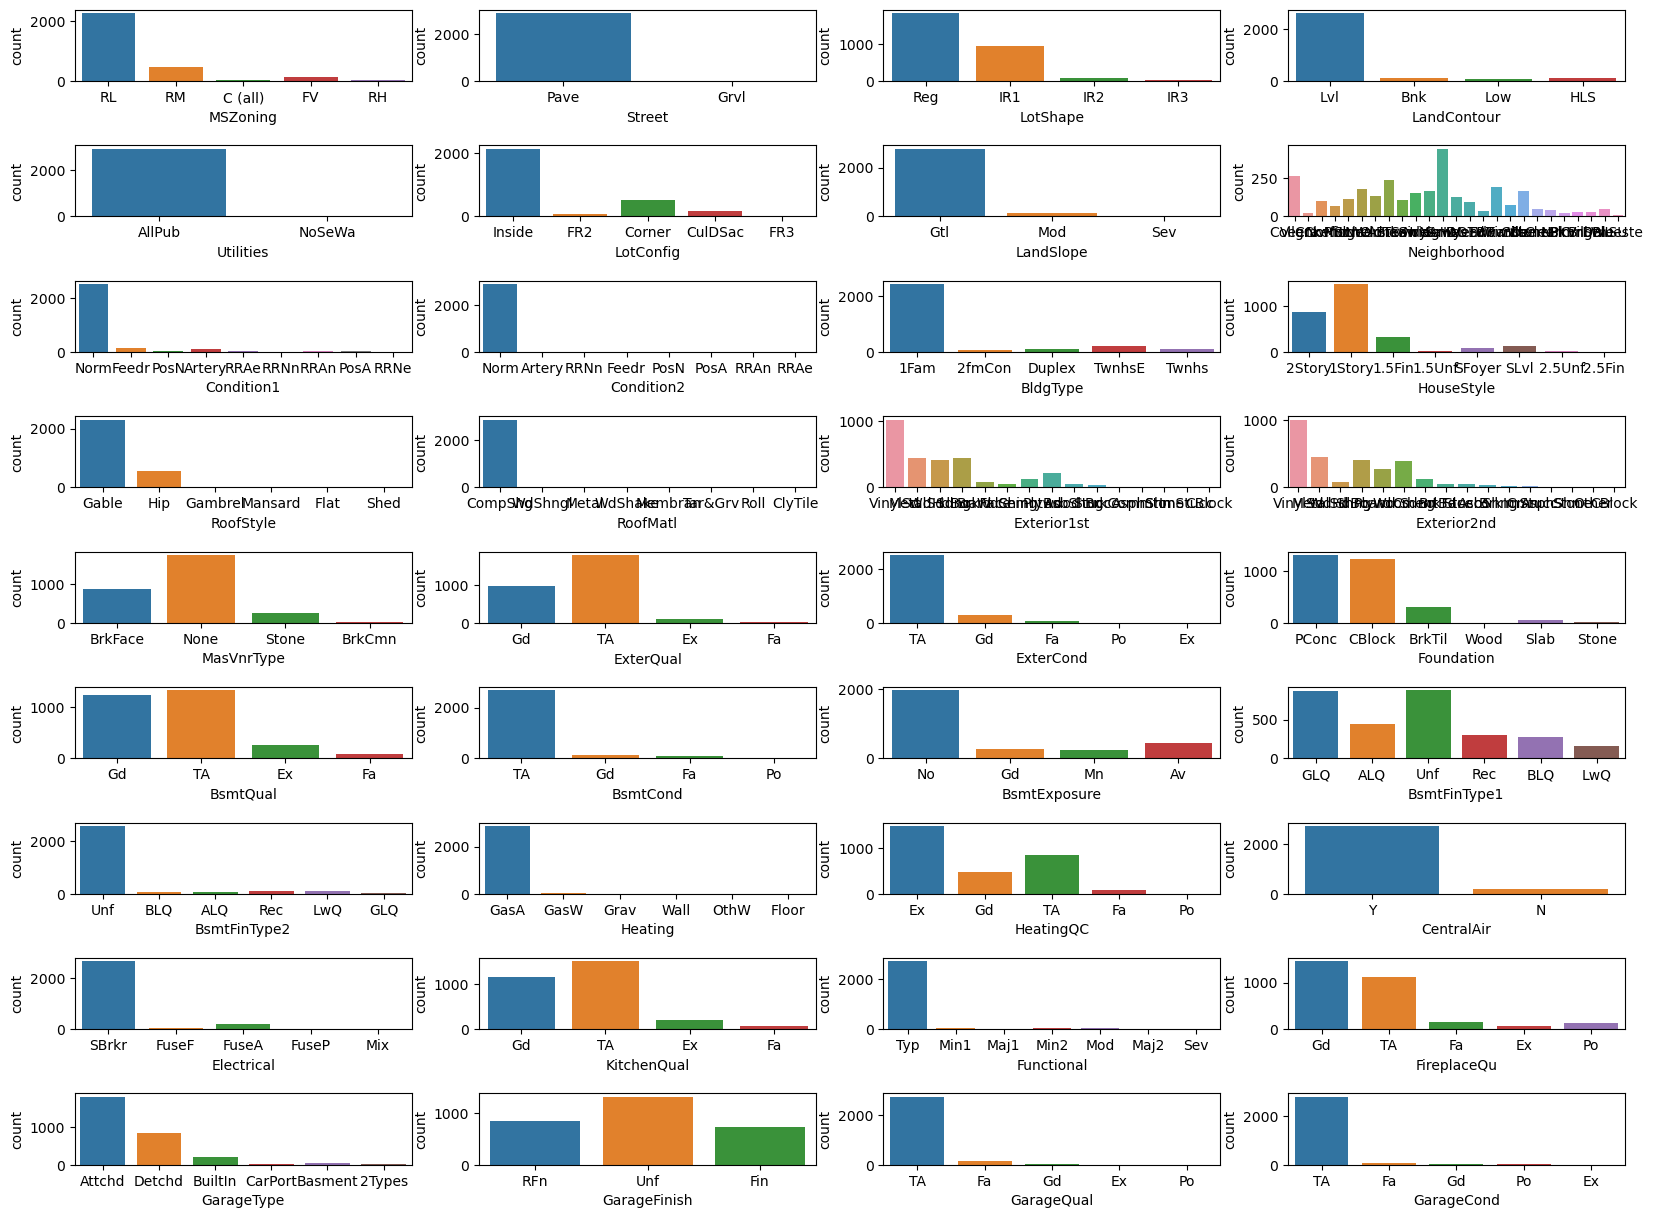

In [33]:
figures, axes = plt.subplots(nrows = 9, ncols = 4, figsize = (20,15), alpha = 0.9)
plt.subplots_adjust(hspace=0.9)
for colum, axe in zip(Categorial_columns, axes.ravel()):
    sns.countplot(data = df, x = colum, ax = axe)

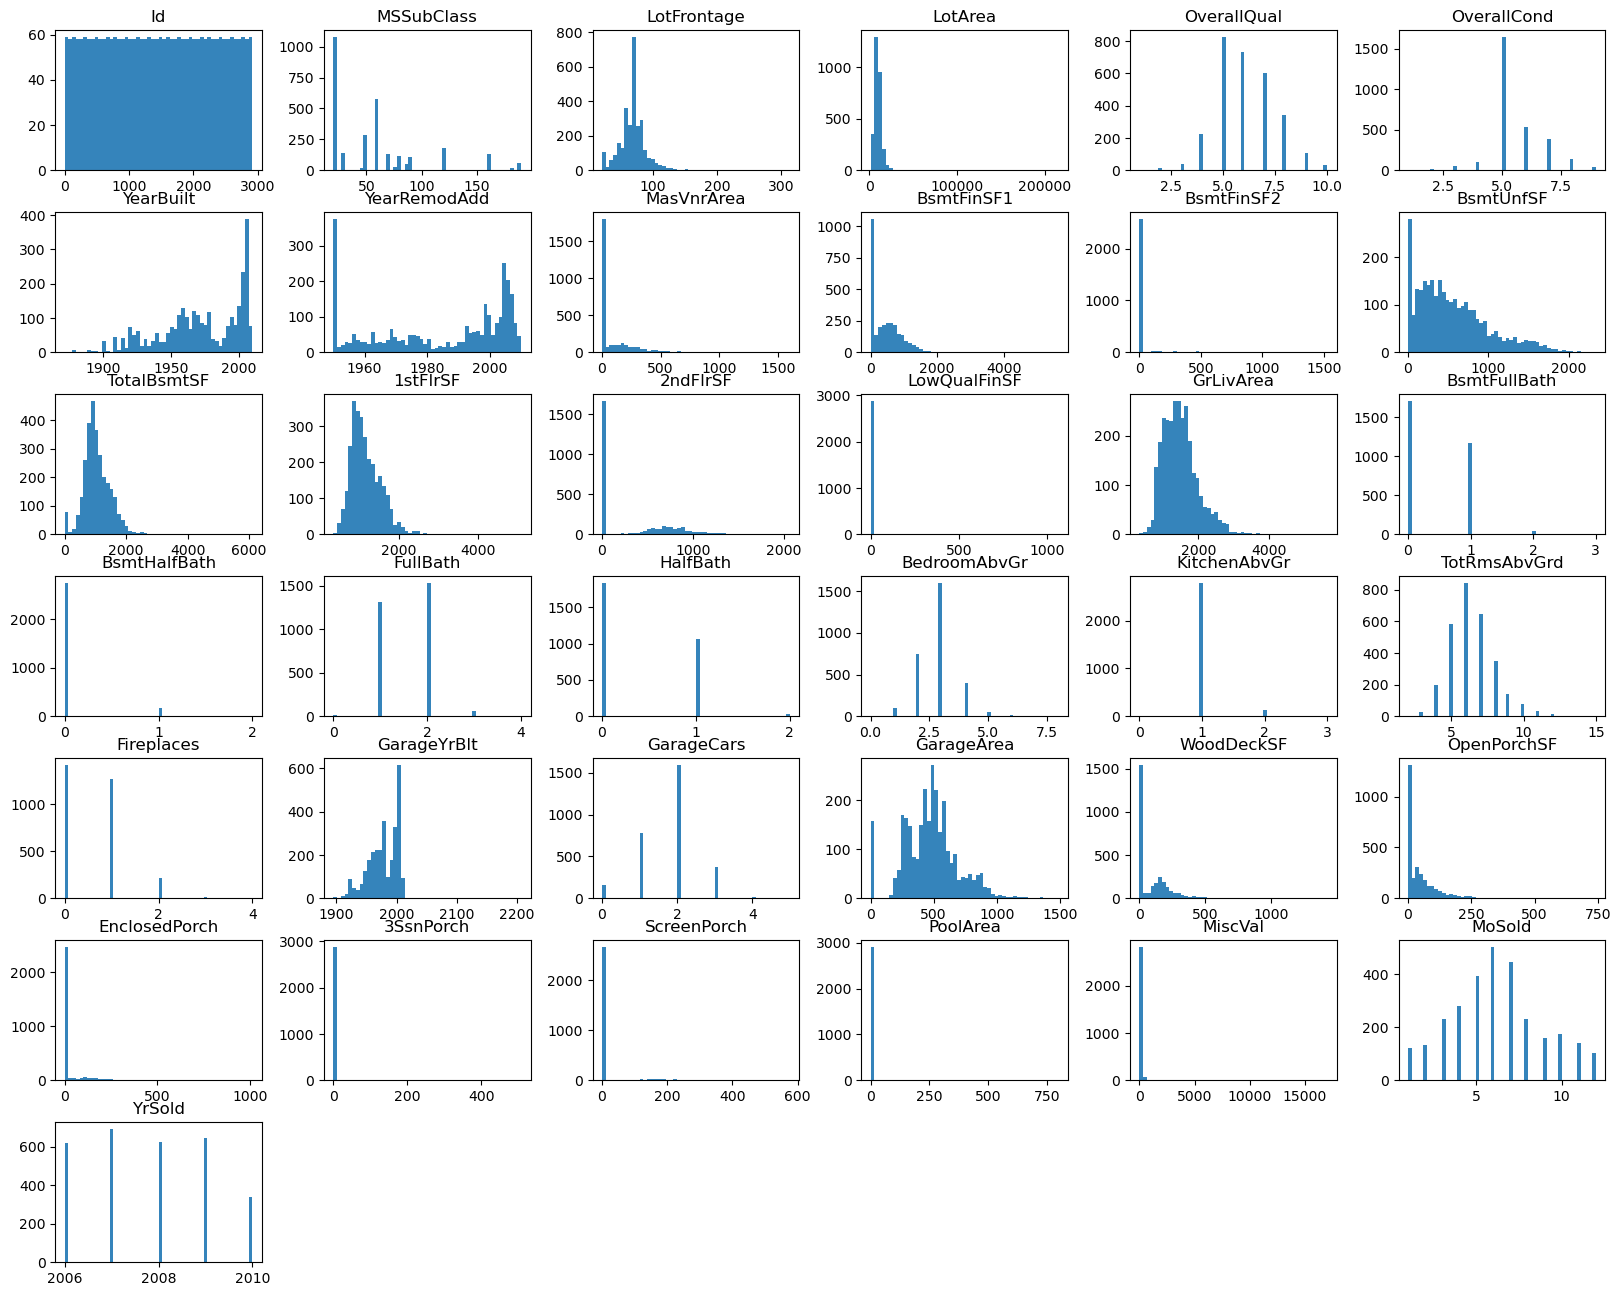

In [34]:
df[Numarical_columns].hist( bins = 50, figsize=(20,16), grid=False,alpha=0.9)
plt.show()

After tranformation, we have the same distribution for our data

## FEATURE ENGENIERING

In [35]:
df[Numarical_columns].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [36]:
df["Age"] = df["YrSold"] - df["YearBuilt"]
df["Age_remodel"] = df["YrSold"] - df["YearRemodAdd"]
df.drop(columns = ["YrSold", "YearBuilt", "YearRemodAdd", "Id"], inplace =True)

In [37]:
Numarical_columns  = [col for col in Numarical_columns if col not in ["YrSold", "YearBuilt", "YearRemodAdd", "Id"]]
df[Numarical_columns].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,60,65.0,8450,7,5,196.0,706.0,0.0,150.0,856.0,...,2.0,548.0,0,61,0,0,0,0,0,2
1,20,80.0,9600,6,8,0.0,978.0,0.0,284.0,1262.0,...,2.0,460.0,298,0,0,0,0,0,0,5
2,60,68.0,11250,7,5,162.0,486.0,0.0,434.0,920.0,...,2.0,608.0,0,42,0,0,0,0,0,9
3,70,60.0,9550,7,5,0.0,216.0,0.0,540.0,756.0,...,3.0,642.0,0,35,272,0,0,0,0,2
4,60,84.0,14260,8,5,350.0,655.0,0.0,490.0,1145.0,...,3.0,836.0,192,84,0,0,0,0,0,12


In [38]:
# get dummies for categorial columns
df1 = pd.get_dummies(df)

## PREDICT

In [39]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.4/256.4 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 59.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.2 MB/s e

In [40]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [41]:
x_train = df1.iloc[:len(train_df), :]
x_train.shape

(1460, 274)

In [42]:
x_train["SalePrice"] = y

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
x_train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [44]:
x_test = df1.iloc[len(train_df):, :].reset_index(drop = True)
x_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,...,0,0,0,1,0,0,0,0,1,0
1,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,...,0,0,0,1,0,0,0,0,1,0
2,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,...,0,0,0,1,0,0,0,0,1,0
3,60,78.0,9978,6,6,20.0,602.0,0.0,324.0,926.0,...,0,0,0,1,0,0,0,0,1,0
4,120,43.0,5005,8,5,0.0,263.0,0.0,1017.0,1280.0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
x_test.shape, test_df.shape

((1459, 274), (1459, 80))

In [46]:
# import pycaret classification and init setup

from pycaret.regression import *

s = setup(x_train, 
          target='SalePrice', 
          normalize=True, 
          fold=5)

,Description,Value
0,Session id,8517
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1460, 275)"
4,Transformed data shape,"(1460, 275)"
5,Transformed train set shape,"(1021, 275)"
6,Transformed test set shape,"(439, 275)"
7,Numeric features,274
8,Preprocess,True
9,Imputation type,simple


In [47]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15201.2029,736013946.8732,26512.4616,0.8767,0.1242,0.0864,5.8220
lightgbm,Light Gradient Boosting Machine,16771.3321,833529173.3930,28232.7898,0.8592,0.1332,0.0951,1.0300
et,Extra Trees Regressor,17947.2064,873176328.6496,29166.7601,0.8510,0.1498,0.1061,1.1720
gbr,Gradient Boosting Regressor,17055.0310,916211911.2280,29411.7863,0.8424,0.1374,0.0977,0.5880
xgboost,Extreme Gradient Boosting,18512.6127,973298680.1674,30319.1103,0.8354,0.1442,0.1061,1.2700
rf,Random Forest Regressor,18293.4629,1015403814.8914,31006.5697,0.8268,0.1475,0.1059,1.1000
par,Passive Aggressive Regressor,17346.7955,1046277820.1234,31083.6756,0.8158,0.1590,0.1037,0.6500
huber,Huber Regressor,17614.6575,1110249136.9374,31837.1592,0.8028,0.1680,0.1074,0.2540
en,Elastic Net,17666.9870,1149167006.8853,32498.5639,0.8004,0.1440,0.1021,0.1500
llar,Lasso Least Angle Regression,17074.0676,1166230423.5306,31678.7063,0.7876,0.1611,0.1028,0.1740


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [48]:
compare_models(sort = "MSE")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15201.2029,736013946.8732,26512.4616,0.8767,0.1242,0.0864,0.2940
lightgbm,Light Gradient Boosting Machine,16771.3321,833529173.3930,28232.7898,0.8592,0.1332,0.0951,0.2540
et,Extra Trees Regressor,17947.2064,873176328.6496,29166.7601,0.8510,0.1498,0.1061,0.6360
gbr,Gradient Boosting Regressor,17055.0310,916211911.2280,29411.7863,0.8424,0.1374,0.0977,0.5480
xgboost,Extreme Gradient Boosting,18512.6127,973298680.1674,30319.1103,0.8354,0.1442,0.1061,0.4620
rf,Random Forest Regressor,18293.4629,1015403814.8914,31006.5697,0.8268,0.1475,0.1059,0.6400
par,Passive Aggressive Regressor,17346.7955,1046277820.1234,31083.6756,0.8158,0.1590,0.1037,0.3780
huber,Huber Regressor,17614.6575,1110249136.9374,31837.1592,0.8028,0.1680,0.1074,0.4280
en,Elastic Net,17666.9870,1149167006.8853,32498.5639,0.8004,0.1440,0.1021,0.5760
llar,Lasso Least Angle Regression,17074.0676,1166230423.5306,31678.7063,0.7876,0.1611,0.1028,0.5560


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [49]:
model = create_model("catboost")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,14090.6462,428152300.9776,20691.8414,0.9335,0.1233,0.0885
1,14294.2860,520417480.7307,22812.6605,0.9132,0.1052,0.0785
2,13964.1674,490254382.3964,22141.6888,0.8938,0.1128,0.0807
3,14948.8755,1047899486.6865,32371.2756,0.7881,0.1341,0.0866
4,18708.0393,1193346083.5750,34544.8416,0.8547,0.1457,0.0978
Mean,15201.2029,736013946.8732,26512.4616,0.8767,0.1242,0.0864
Std,1785.9262,318773796.2767,5753.5490,0.0513,0.0145,0.0068


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

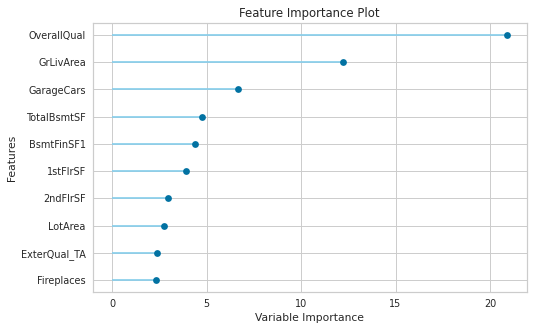

In [50]:
plot_model(model, plot = 'feature', scale=0.7)

In [51]:
model = tune_model(model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16381.4559,536918628.9687,23171.5047,0.9166,0.1394,0.1045
1,16191.8742,685285958.8882,26177.9671,0.8858,0.1167,0.0891
2,16482.1771,619685013.5871,24893.4733,0.8658,0.1336,0.0990
3,17569.6239,1036617622.8329,32196.5468,0.7904,0.1513,0.1064
4,21163.4270,1347011039.0717,36701.6490,0.8360,0.1595,0.1133
Mean,17557.7116,845103652.6697,28628.2282,0.8589,0.1401,0.1024
Std,1865.8612,303289265.2956,5052.5444,0.0431,0.0148,0.0081


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [52]:
pred_test = predict_model(model, data = x_test)

pred_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,prediction_label
0,20,80.0,11622,5,6,0.0,468.0,144.0,270.0,882.0,...,0,0,1,0,0,0,0,1,0,122625.045944
1,20,81.0,14267,6,6,108.0,923.0,0.0,406.0,1329.0,...,0,0,1,0,0,0,0,1,0,161090.406999
2,60,74.0,13830,5,5,0.0,791.0,0.0,137.0,928.0,...,0,0,1,0,0,0,0,1,0,184671.312202
3,60,78.0,9978,6,6,20.0,602.0,0.0,324.0,926.0,...,0,0,1,0,0,0,0,1,0,189968.536202
4,120,43.0,5005,8,5,0.0,263.0,0.0,1017.0,1280.0,...,0,0,1,0,0,0,0,1,0,184282.788647


In [53]:
predict = pred_test.prediction_label

In [54]:
predict

0       122625.045944
1       161090.406999
2       184671.312202
3       189968.536202
4       184282.788647
            ...      
1454     78354.940128
1455     80137.585363
1456    164774.527413
1457    117884.690897
1458    230490.075493
Name: prediction_label, Length: 1459, dtype: float64

In [55]:
predict_final = pd.DataFrame({"Id": test_df.Id, "SalePrice": predict })
predict_final.to_csv('submission.csv', index = False)

In [56]:
!head submission.csv

Id,SalePrice
1461,122625.04594358269
1462,161090.40699917762
1463,184671.31220173434
1464,189968.5362024073
1465,184282.7886469302
1466,172640.33286710695
1467,171519.45812168124
1468,169831.93142767865
1469,187701.54869025183
